In [1]:
#%pip install opencv-python
import cv2
video = cv2.VideoCapture('my_vid.mp4')

# 1. Acquisition Chargement et Sauvegarde

In [2]:
width  = int(video.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(video.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps    = video.get(cv2.CAP_PROP_FPS)
frames = int(video.get(cv2.CAP_PROP_FRAME_COUNT))
print('Width:', width, 'Height:', height, 'FPS:', fps, 'Frames:', frames)

Width: 640 Height: 360 FPS: 29.97002997002997 Frames: 282


Les propriétés accessibles via CAP_PROP_* permettent d’obtenir des informations utiles pour le traitement ultérieur.

In [3]:
success, frame = video.read()
count = 0
while success:
    if count in [20, 50, 100]:
        cv2.imwrite(f'frame_{count}.png', frame)
    success, frame = video.read()
    count += 1


In [4]:
video = cv2.VideoCapture('my_vid.mp4')
success, frame = video.read()   
while success:
    cv2.imshow('Frame', frame)
    # Wait 50 milliseconds, exit if 'q' is pressed
    if cv2.waitKey(50) & 0xFF == ord('q'):
        break
    success, frame = video.read()
cv2.destroyAllWindows()
video.release()

# 2. Segmentation spatiale: Conversion et seuillage

In [6]:
video = cv2.VideoCapture("my_vid.mp4")

while True:
    ret, frame = video.read()
    if not ret:
        break
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    cv2.imshow("Gray", gray)
    if cv2.waitKey(30) & 0xFF == ord('q'):
        break
video.release()
cv2.destroyAllWindows()

Conversion par cvtColor() selon le modèle de niveaux de gris pour faciliter le seuillage.

In [7]:
import numpy as np

def global_thresholding(image, T_init=100, epsilon=1):
    prev_T = 0
    T = T_init
    while abs(T - prev_T) >= epsilon:
        prev_T = T
        G1 = image[image >= T]
        G2 = image[image < T]
        m1 = np.mean(G1) if G1.size > 0 else 0
        m2 = np.mean(G2) if G2.size > 0 else 0
        T = int((m1 + m2) / 2)
    _, binary = cv2.threshold(image, T, 255, cv2.THRESH_BINARY)
    return binary, T

#explanation
"""
This code implements a global thresholding algorithm for image segmentation.
1. The function `global_thresholding` takes an image and initial threshold `T_init` as input.
2. It iteratively refines the threshold `T` until the change is smaller than `epsilon`.
3. In each iteration, it splits the pixel values into two groups: G1 (above threshold) and G2 (below threshold).
4. It computes the mean values of both groups and updates the threshold to the average of these means.
5. Finally, it applies the threshold to create a binary image and returns both the binary image and the final threshold.
"""
# Example usage:
image = cv2.imread('frame_100.png', cv2.IMREAD_GRAYSCALE)
binary, T_final = global_thresholding(image)
cv2.imwrite('binary_frame_100.png', binary)

True

In [8]:
video = cv2.VideoCapture("my_vid.mp4")
while True:
    ret, frame = video.read()
    if not ret:
        break
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    _, segmented = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    cv2.imshow("Original", frame)
    cv2.imshow("Otsu", segmented)
    if cv2.waitKey(30) & 0xFF == ord('q'):
        break
video.release()
cv2.destroyAllWindows()
#explanation of Otsu's method
"""
Otsu's method is a global thresholding technique used for image segmentation.
1. It automatically determines the optimal threshold value (T) by maximizing the between-class variance.
2. The algorithm computes the histogram of the grayscale image and its cumulative distribution function (CDF).
3. For each possible threshold, it calculates the weighted sum of the variances of the two classes (foreground and background).
4. The threshold that results in the maximum between-class variance is selected as the optimal threshold.
5. This method is particularly effective for images with a bimodal histogram.
6. The final binary image is created by applying the optimal threshold, separating the foreground from the background.
"""

"\nOtsu's method is a global thresholding technique used for image segmentation.\n1. It automatically determines the optimal threshold value (T) by maximizing the between-class variance.\n2. The algorithm computes the histogram of the grayscale image and its cumulative distribution function (CDF).\n3. For each possible threshold, it calculates the weighted sum of the variances of the two classes (foreground and background).\n4. The threshold that results in the maximum between-class variance is selected as the optimal threshold.\n5. This method is particularly effective for images with a bimodal histogram.\n6. The final binary image is created by applying the optimal threshold, separating the foreground from the background.\n"

# 3. Segmentation temporelle

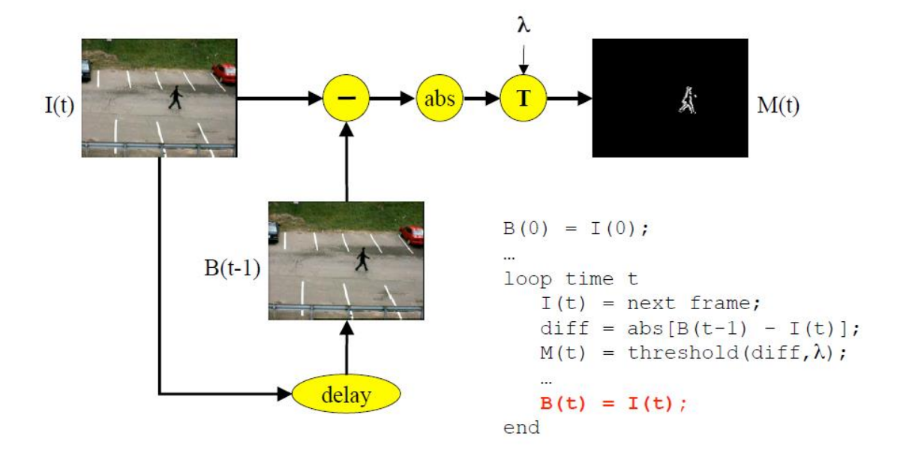

In [9]:
video = cv2.VideoCapture("my_vid.mp4")
ret, prev_frame = video.read()
frame_count = 0

while True:
    ret, curr_frame = video.read()
    if not ret:
        break
    diff = cv2.absdiff(cv2.cvtColor(curr_frame, cv2.COLOR_BGR2GRAY),
                       cv2.cvtColor(prev_frame, cv2.COLOR_BGR2GRAY))
    _, thresh = cv2.threshold(diff, 30, 255, cv2.THRESH_BINARY)

    # Enregistrer quelques frames (ex : toutes les 50 images)
    if frame_count % 50 == 0:
        cv2.imwrite(f"result_frame_{frame_count}.png", thresh)

    prev_frame = curr_frame
    frame_count += 1

    cv2.imshow("Frame Difference", thresh)
    prev_frame = curr_frame
    if cv2.waitKey(30) & 0xFF == ord('q'):
        break
video.release()
cv2.destroyAllWindows()
#explanation of temporal segmentation
"""
Temporal segmentation is a technique used to identify and isolate moving objects in video sequences.
1. It involves analyzing the differences between consecutive frames to detect motion.
2. The process typically includes converting frames to grayscale and computing the absolute difference.
3. A threshold is applied to the difference image to create a binary mask highlighting moving regions.
4. This method is effective for applications like object tracking and activity recognition.
5. By focusing on changes over time, temporal segmentation can robustly identify dynamic elements in a scene.
"""

'\nTemporal segmentation is a technique used to identify and isolate moving objects in video sequences.\n1. It involves analyzing the differences between consecutive frames to detect motion.\n2. The process typically includes converting frames to grayscale and computing the absolute difference.\n3. A threshold is applied to the difference image to create a binary mask highlighting moving regions.\n4. This method is effective for applications like object tracking and activity recognition.\n5. By focusing on changes over time, temporal segmentation can robustly identify dynamic elements in a scene.\n'

### Figure 1 – Frame originale (sans mouvement)

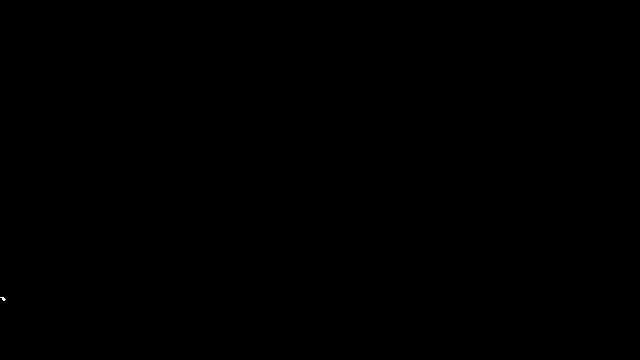

In [12]:
from IPython.display import Image, display
display(Image(filename="result_frame_0.png"))

Le fond est statique, aucune différence n’est détectée entre les images t−1 et t.

### Figure 2 – Début du mouvement

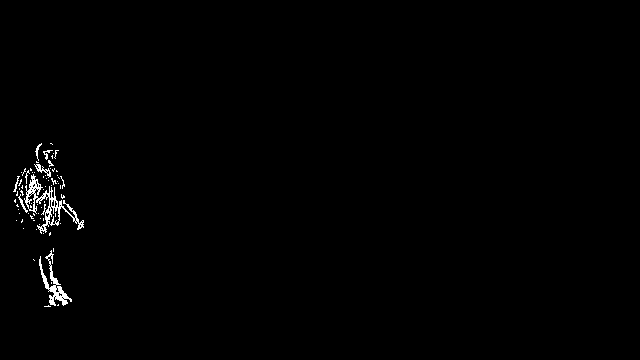

In [13]:
from IPython.display import Image, display
display(Image(filename="result_frame_50.png"))

La personne commence à bouger à gauche de l’image. Les zones blanches indiquent le changement entre les deux frames.

### Figure 3 - Mouvement détecté clairement

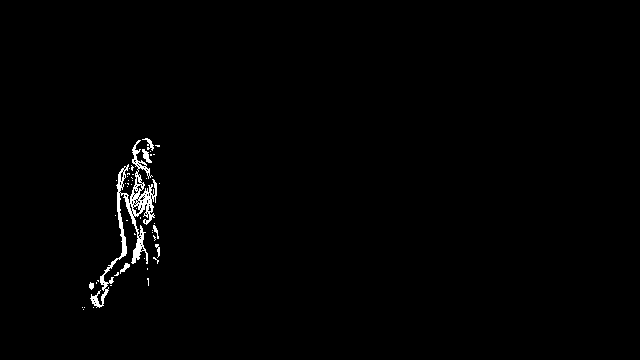

In [14]:
from IPython.display import Image, display
display(Image(filename="result_frame_100.png"))

La personne est bien visible sous forme de tache blanche, preuve que la soustraction d’images détecte efficacement le déplacement

## Différenciation sur 3 frames (méthode D(±N))

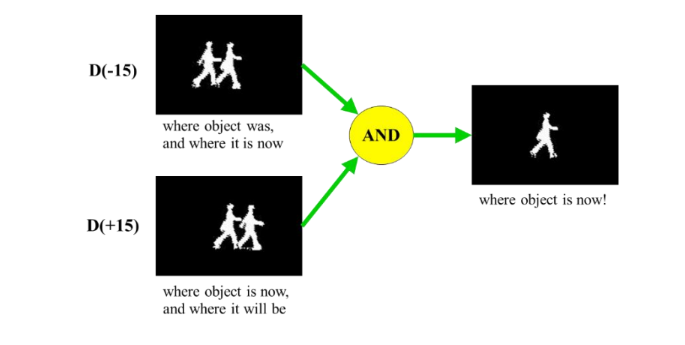

In [43]:
def difference_N(video_path, N=5):
    video = cv2.VideoCapture(video_path)
    frames = []
    while True:
        ret, frame = video.read()
        if not ret:
            break
        frames.append(cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY))
    for t in range(len(frames)-N):
        D_minus = cv2.absdiff(frames[t], frames[t+N])
        D_plus  = cv2.absdiff(frames[t+N], frames[t+2*N]) if t+2*N < len(frames) else D_minus
        motion = cv2.bitwise_and(D_minus, D_plus)
        cv2.imshow("Motion Detection", motion)
        if cv2.waitKey(30) & 0xFF == ord('q'):
            break
    video.release()
    cv2.destroyAllWindows()

difference_N("my_vid.mp4", N=10)


La valeur de N = 15 a été choisie de manière empirique afin d’assurer une bonne sensibilité aux mouvements tout en limitant les fausses détections dues au bruit. À 30 FPS, cet intervalle temporel correspond à 0,5 seconde, offrant un bon compromis entre réactivité et stabilité.

In [46]:
import cv2
import numpy as np

def save_motion_frames_milieu(video_path, N_values, frames_to_save=1):
    video = cv2.VideoCapture(video_path)
    total_frames = int(video.get(cv2.CAP_PROP_FRAME_COUNT))
    mid_frame = total_frames // 2

    frames = []
    # Lire toutes les frames
    while True:
        ret, frame = video.read()
        if not ret:
            break
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        frames.append(gray)
    video.release()

    # Traiter seulement à partir du milieu de la vidéo
    for N in N_values:
        saved_count = 0
        for t in range(mid_frame, len(frames) - 2 * N):
            D_minus = cv2.absdiff(frames[t], frames[t + N])
            D_plus = cv2.absdiff(frames[t + N], frames[t + 2 * N])
            motion = cv2.bitwise_and(D_minus, D_plus)
            _, motion_bin = cv2.threshold(motion, 30, 255, cv2.THRESH_BINARY)

            if np.sum(motion_bin) > 0:
                if saved_count < frames_to_save:
                    combined = np.hstack((frames[t], motion_bin))
                    cv2.imwrite(f"motion_N{N}_frame{t}.png", combined)
                    saved_count += 1
                else:
                    break

# Changer video_path selon ta vidéo
save_motion_frames_milieu("my_vid.mp4", N_values=[5 ,6 , 7, 8 ,9 ,10, 15, 25], frames_to_save=1)


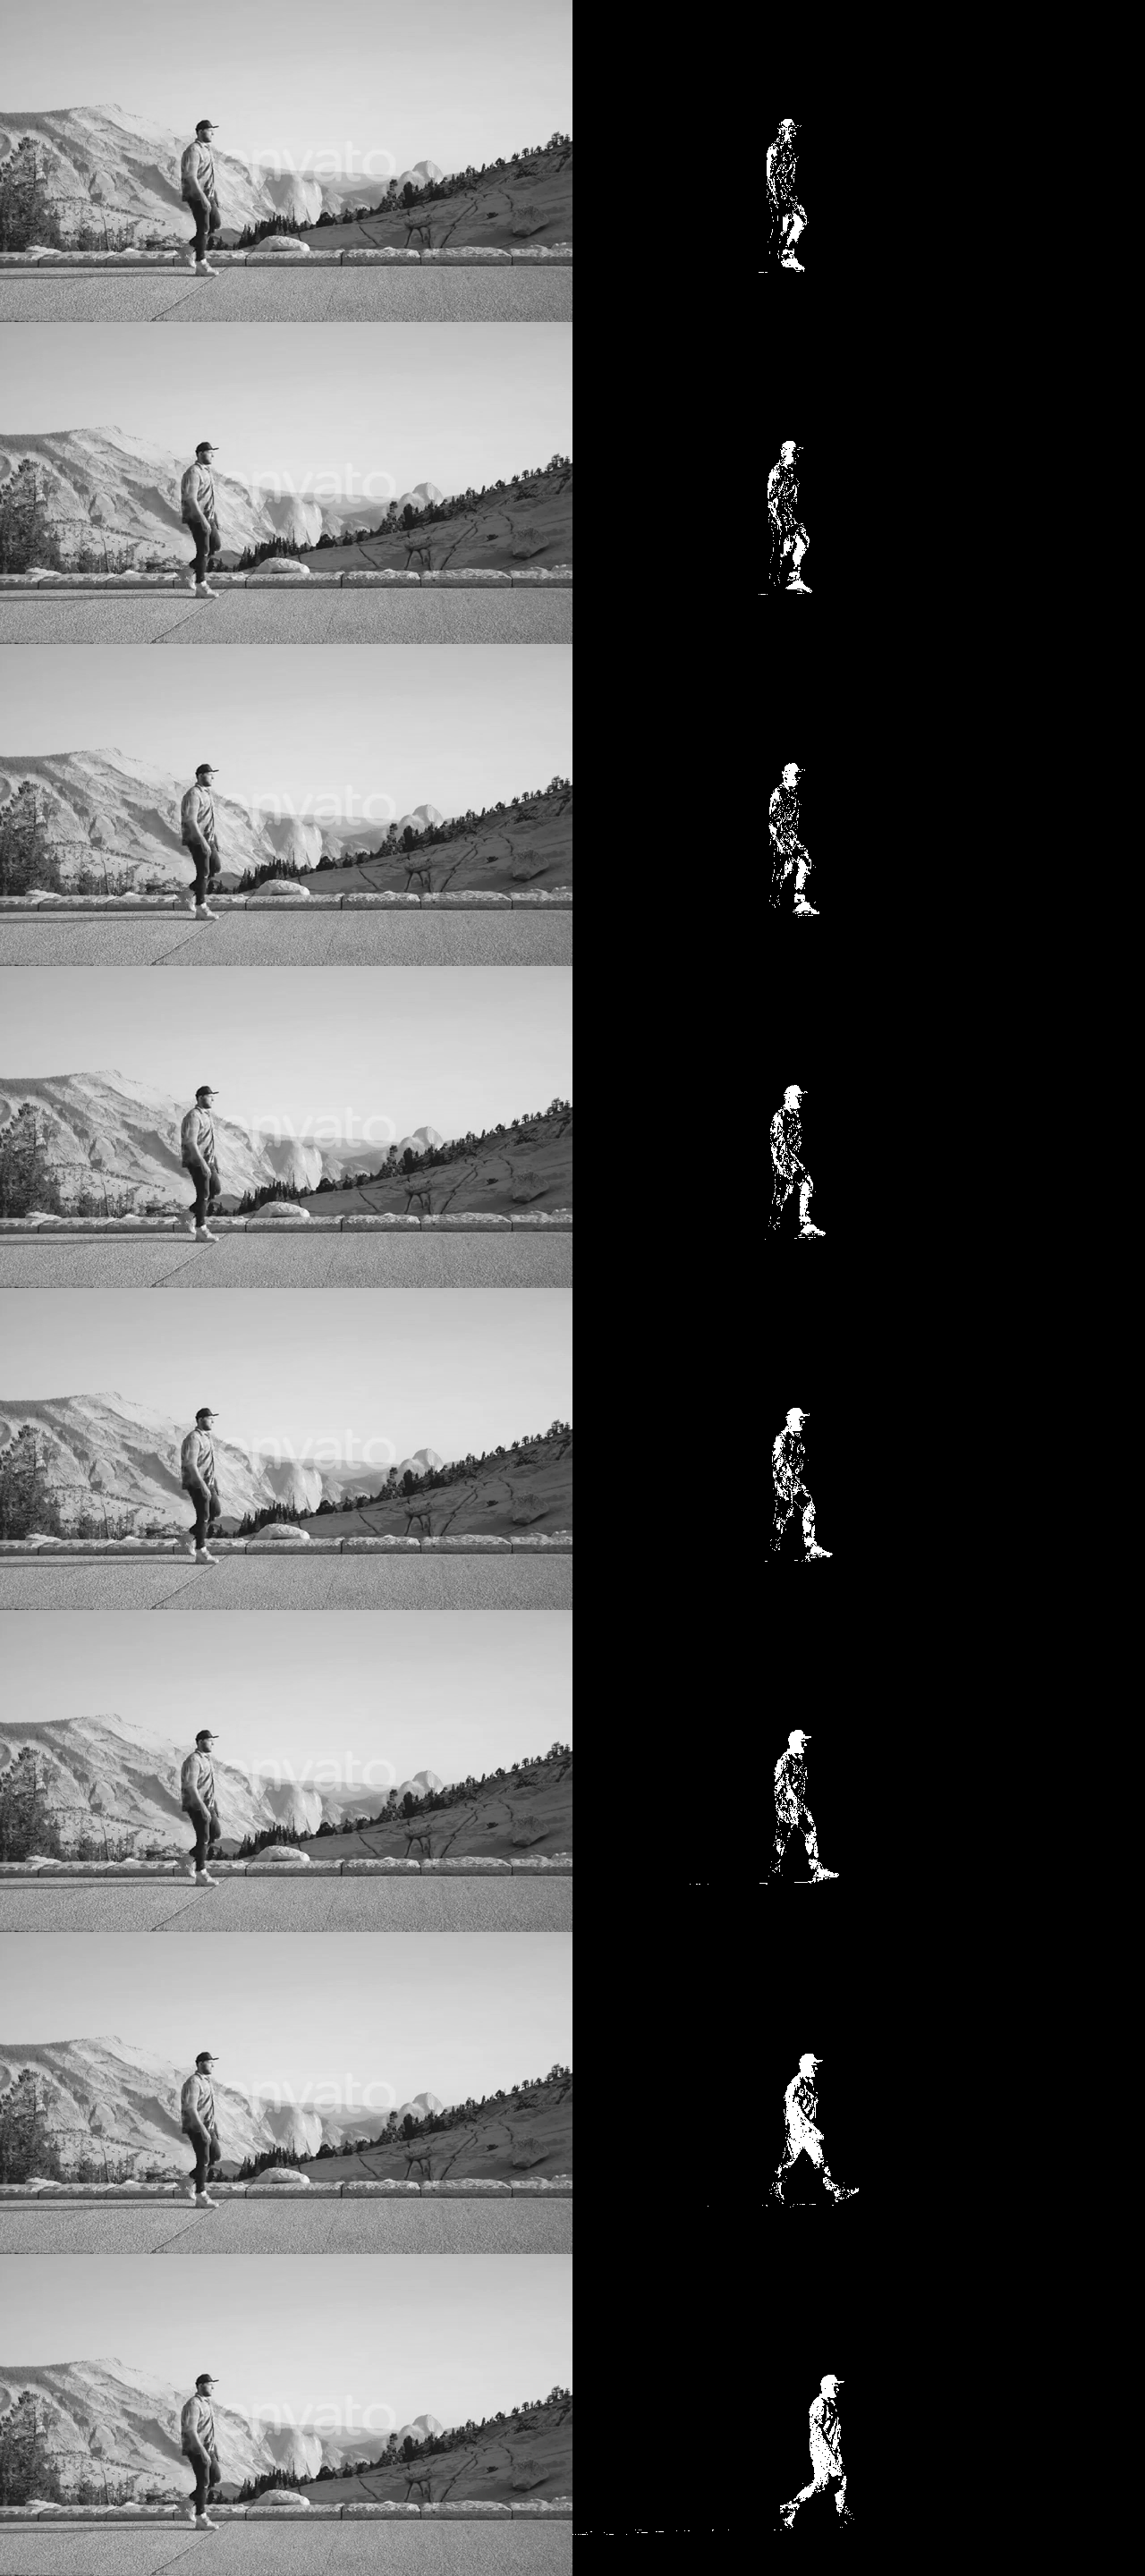

In [50]:
from PIL import Image, ImageDraw, ImageFont
from IPython.display import display

# Liste des N testés et fichiers correspondants (adapte les noms de fichiers selon ta génération)
N_values = [5, 6, 7, 8, 9, 10, 15, 25]
images = []
for N in N_values:
    img = Image.open(f"motion_N{N}_frame141.png")  # Remplace "frameXYZ" par ton index
    images.append(img)

# Fusionne tout verticalement
width, height = images[0].size
combined = Image.new('RGB', (width, height * len(images)))
for i, img in enumerate(images):
    combined.paste(img, (0, i * height))

display(combined)

Le léger décalage temporel observé entre la position réelle du personnage et la silhouette détectée montre que la méthode D(±N) met en évidence les zones de changement entre deux instants séparés de N ou 2N images. Ce compromis est acceptable car il permet de filtrer le bruit et de capturer le mouvement principal, quitte à perdre la synchronisation exacte du mouvement. Si une détection parfaitement instantanée est recherchée, il conviendrait de réduire N ou d’utiliser une autre approche, au prix d’une sensibilité accrue au bruit.

## Adaptive Background Subtraction

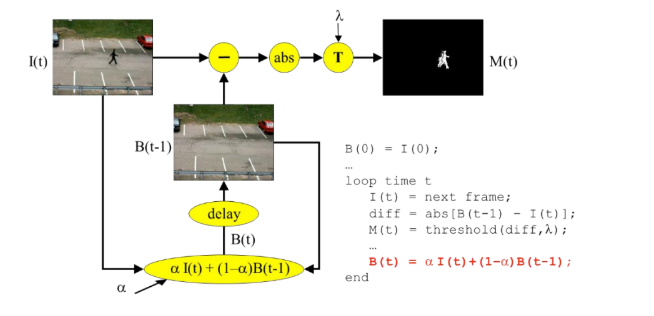

In [52]:
import cv2
import numpy as np

def adaptive_bg_sub_oneframe(video_path, alpha=0.05, frame_to_save=141):
    video = cv2.VideoCapture(video_path)
    ret, background = video.read()
    background = cv2.cvtColor(background, cv2.COLOR_BGR2GRAY)
    
    index = 1  # Numéro de la frame courante (commence à 1 si déjà lu la première)
    saved = False
    while True:
        ret, frame = video.read()
        if not ret:
            break
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        background = cv2.addWeighted(gray, alpha, background, 1 - alpha, 0)
        diff = cv2.absdiff(gray, background)
        _, motion = cv2.threshold(diff, 25, 255, cv2.THRESH_BINARY)
        
        if index == frame_to_save and not saved:
            combined = np.hstack((gray, motion))
            cv2.imwrite(f"adaptive_bg_alpha{alpha}_frame{index}.png", combined)
            saved = True
        index += 1

    video.release()

# Change les valeurs de alpha et la frame sauvée selon ton besoin
for alpha in [0.01, 0.05, 0.1, 0.2]:
    adaptive_bg_sub_oneframe("my_vid.mp4", alpha, frame_to_save=141)


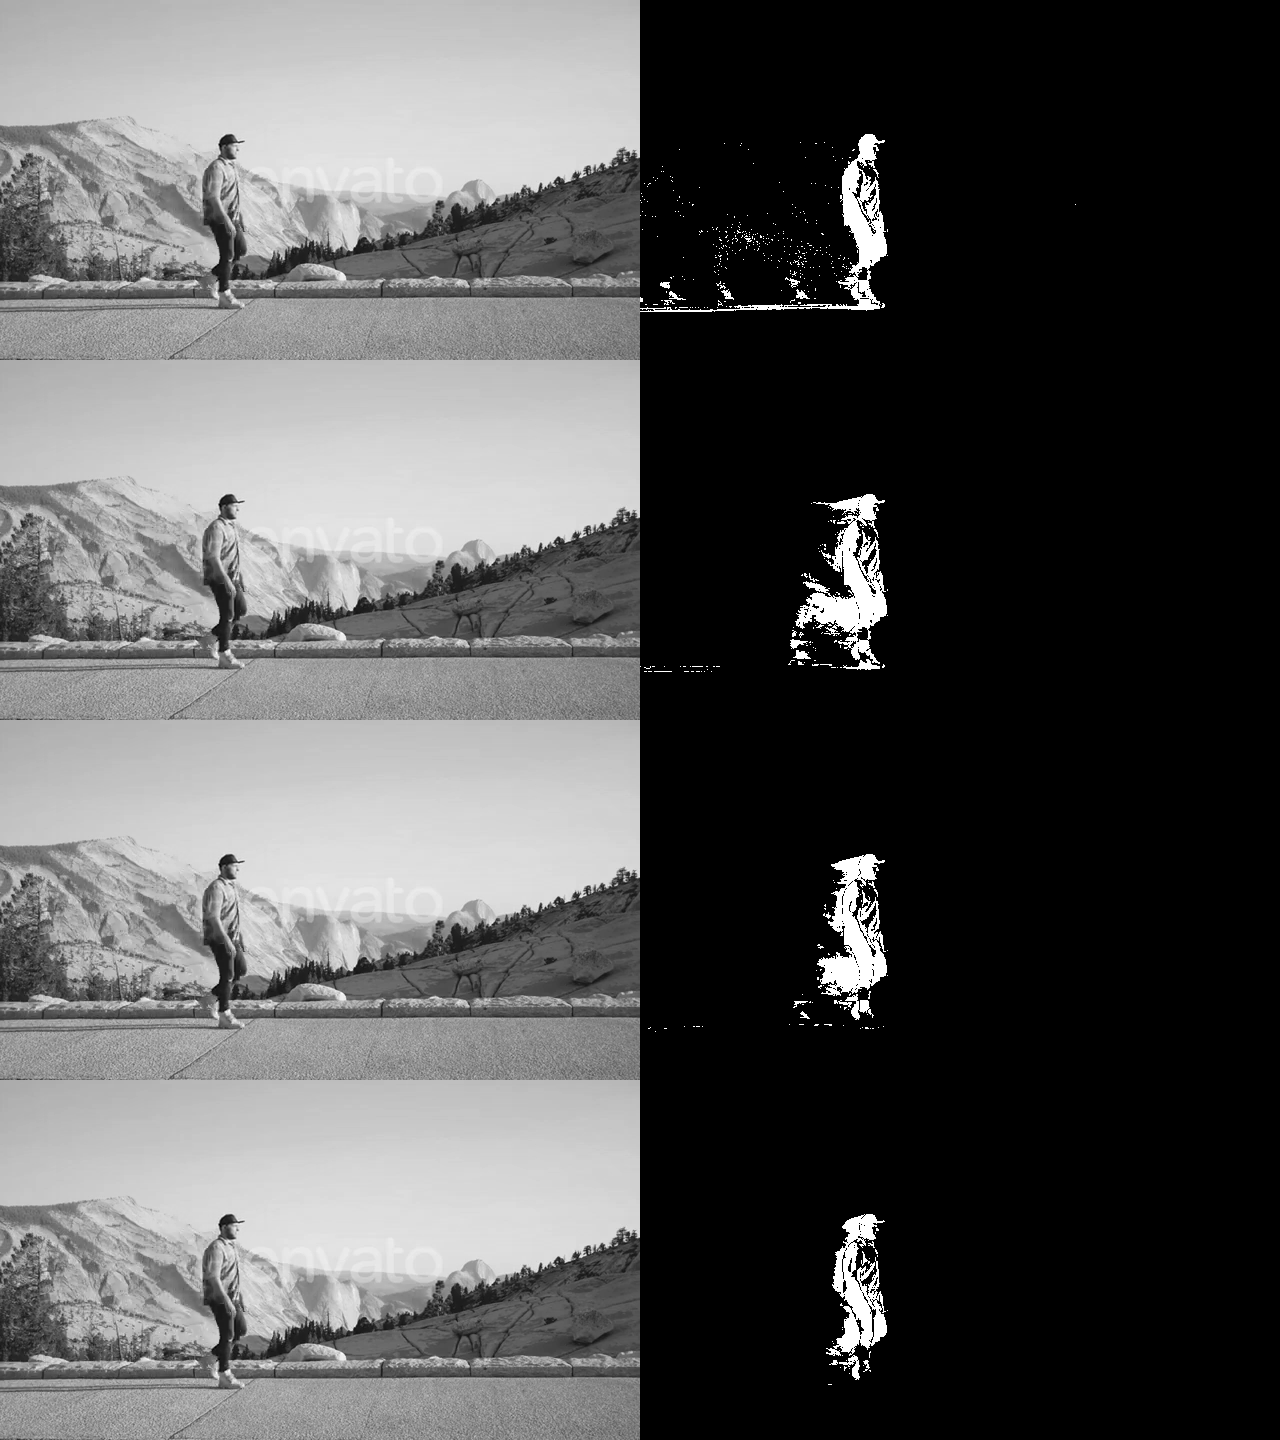

In [53]:
from PIL import Image
from IPython.display import display

# Liste des alpha testés et fichiers correspondants
alpha_values = [0.01, 0.05, 0.1, 0.2]
images = []
for alpha in alpha_values:
    img = Image.open(f"adaptive_bg_alpha{alpha}_frame141.png")
    images.append(img)

# Fusionne tout verticalement
width, height = images[0].size
combined = Image.new('RGB', (width, height * len(images)))
for i, img in enumerate(images):
    combined.paste(img, (0, i * height))

display(combined)


Après observation des images générées avec différentes valeurs de α, on note que α=0.2 offre un bon compromis : le fond s’adapte suffisamment vite pour éliminer les traînées fantômes tout en restant assez stable pour ne pas inclure les objets mobiles trop rapidement dans le fond. Un α trop faible (0.01) rend la détection trop "lente", alors qu’un α trop élevé produit du bruit lors de mouvements lents. 

## BackgroundSubtractorMOG2

Principe :
Cette méthode se base sur un modèle de mélange de Gaussiennes (GMM) pour chaque pixel :

Chaque pixel est modélisé comme une combinaison de plusieurs distributions de couleurs ;

Le modèle évolue afin de suivre les changements du fond (éclairage, objets statiques, etc.) ;

Elle gère l’apparition/disparition d’objets et détecte les ombres.

In [54]:
import cv2

video = cv2.VideoCapture("my_vid.mp4")
fgbg = cv2.createBackgroundSubtractorMOG2(detectShadows=True)

index = 0
while True:
    ret, frame = video.read()
    if not ret:
        break
    fgmask = fgbg.apply(frame)
    if index == 141:  # Sauvegarde au milieu de la scène
        cv2.imwrite('mog2_frame141.png', fgmask)
        break
    index += 1
video.release()


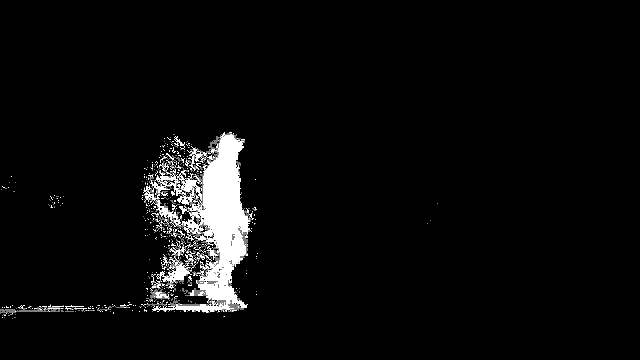

In [55]:
from IPython.display import Image, display
display(Image(filename="mog2_frame141.png"))

Les ombres sont souvent marquées différemment (valeur 127 dans le masque) ;

Adapté aux scènes légèrement dynamiques mais peut manquer de précision avec des objets lents ou statiques ;

Les résultats sont généralement nets, mais des artefacts ou de légères traînées peuvent apparaître.

## BackgroundSubtractorKNN

Principe :
Cette méthode utilise l’algorithme des k-plus proches voisins (KNN) pour modéliser le fond :

Elle crée une mémoire pour chaque pixel, stockant ses valeurs précédentes ;

À chaque nouvelle frame, si le pixel est similaire à ses voisins en mémoire, il est considéré comme du fond ;

Si non, il est marqué comme premier plan ;

Adaptée aux scènes avec des variations rapides du fond, elle est plus tolérante aux mouvements ambiants.

In [56]:
video = cv2.VideoCapture("my_vid.mp4")
fgbg = cv2.createBackgroundSubtractorKNN(detectShadows=True)
index = 0
while True:
    ret, frame = video.read()
    if not ret:
        break
    fgmask = fgbg.apply(frame)
    if index == 141:
        cv2.imwrite('knn_frame141.png', fgmask)
        break
    index += 1
video.release()


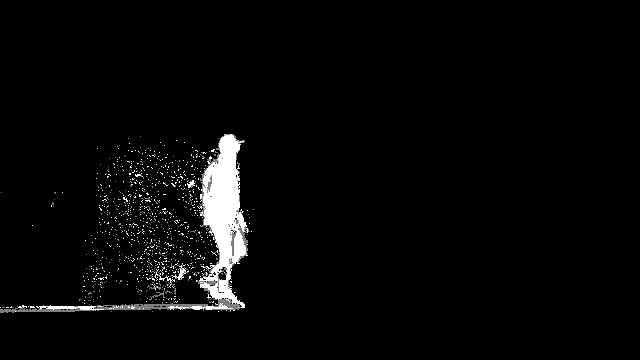

In [ ]:
from IPython.display import Image, display
display(Image(filename="knn_frame141.png"))

Soustraction généralement rapide et efficace sur les mouvements nets ;

Peut générer plus de bruit sur les objets très petits ou très rapides ;

Le fond est adapté en continu, gérant bien les variations soudaines de lumière ou environnement